# Prediction

Separate validation and test images.

In [4]:
import os

def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

# Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
print("Current Working Directory {}".format(os.getcwd()))
path_dict = {
    "nnUNet_raw" : os.path.join(os.getcwd(), "nnUNet_raw"), 
    "nnUNet_preprocessed" : os.path.join(os.getcwd(), "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 112s
    "nnUNet_results" : os.path.join(os.getcwd(), "nnUNet_results"),
    "RAW_DATA_PATH" : os.path.join(os.getcwd(), "original_data"), # This is used here only for convenience (not necessary for nnU-Net)!
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path 

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")

Current Working Directory /scratch/alif/nnUNet
/scratch/alif/nnUNet/nnUNet_raw exists.
/scratch/alif/nnUNet/nnUNet_preprocessed exists.
/scratch/alif/nnUNet/nnUNet_results exists.
/scratch/alif/nnUNet/original_data exists.
If No Error Occured Continue Forward. =)


In [5]:
# os.environ['nnUNet_raw_data_base'] = '/scratch/alif/nnUNet/original_data'
os.environ['nnUNet_raw_data_base'] = '/scratch/alif/nnUNet/nnUNet_raw_data_base'
os.environ['nnUNet_preprocessed'] = '/scratch/alif/nnUNet/nnUNet_preprocessed'
os.environ['RESULTS_FOLDER'] = '/scratch/alif/nnUNet/nnUNet_trained_models'

In [11]:
! nnUNet_predict -i "original_data/pancreas_validation/images" -o "original_data/pancreas_validation_preds" -d 6 -c 3d_fullres



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

usage: nnUNet_predict [-h] -i INPUT_FOLDER -o OUTPUT_FOLDER -t TASK_NAME
                      [-tr TRAINER_CLASS_NAME]
                      [-ctr CASCADE_TRAINER_CLASS_NAME] [-m MODEL]
                      [-p PLANS_IDENTIFIER] [-f FOLDS [FOLDS ...]] [-z]
                      [-l LOWRES_SEGMENTATIONS] [--part_id PART_ID]
                      [--num_parts NUM_PARTS]
                      [--num_threads_preprocessing NUM_THREADS_PREPROCESSING]
                      [--num_threads_nifti_save NUM_THREADS_NIFTI_SAVE]
                      [--disable_tta] [--overwrite_existing] [--mode MODE]
                      [--all_in_gpu ALL_

In [ ]:
! nnUNet_predict -i "original_data/pancreas_validation/images" -o "original_data/pancreas_validation_preds" -t 6 -tr nnUNetTrainerV2_Custom -m 3d_fullress --num_threads_preprocessing 24



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /scratch/alif/nnUNet/nnUNet_trained_models/nnUNet/3d_fullres/Task006_PancreasUHN/nnUNetTrainerV2_Custom__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 36 unique case ids, here are some examples: ['quiz_2_379' 'quiz_0_254' 'quiz_2_074' 'quiz_1_335' 'quiz_1_221'
 'quiz_2_080' 'quiz_1_213' 'quiz_1_242' 'quiz_1_242' 'quiz_1_227']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 36
number of cases that still need to be predicted: 36
emptying cuda cache
loading parameters for folds, None
folds is None so we will au

In [183]:
import os
import shutil

source_dir = 'original_data/UHN-MedImg3D-ML-quiz/validation'
destination_dir = 'original_data/pancreas_validation'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

for subdir in os.listdir(source_dir):
    subdir_path = os.path.join(source_dir, subdir)

    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file)

            if os.path.isfile(file_path):
                shutil.copy(file_path, destination_dir)
                print(f"Copied: {file_path} to {destination_dir}")


Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_191_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_088.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_241_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_084_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_377_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_098_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_089_0000.nii.gz to original_data/pancreas_validation
Copied: original_data/UHN-MedImg3D-ML-quiz/validation/subtype2/quiz_2_085_0000.nii.gz to original_data/pancreas_validation
Copied: original_data

In [185]:
! cp original_data/UHN-MedImg3D-ML-quiz/test original_data/pancreas_test -r

In [190]:
import os
import shutil

source_dir = 'original_data/pancreas_validation'
destination_dir = 'original_data/pancreas_validation/images'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

if os.path.isdir(source_dir):
    for file in os.listdir(source_dir):
        file_path = os.path.join(source_dir, file)

        if os.path.isfile(file_path):
            if file.endswith('_0000.nii.gz'):
                shutil.move(file_path, destination_dir)
                print(f"Moved: {file_path} to {destination_dir}")

Moved: original_data/pancreas_validation/quiz_2_191_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_1_211_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_0_253_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_1_164_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_2_241_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_1_231_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_0_254_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_2_084_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancreas_validation/quiz_0_174_0000.nii.gz to original_data/pancreas_validation/images
Moved: original_data/pancrea

In [191]:
import os
import shutil

source_dir = 'original_data/pancreas_validation'
destination_dir = 'original_data/pancreas_validation/labels'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

if os.path.isdir(source_dir):
    for file in os.listdir(source_dir):
        file_path = os.path.join(source_dir, file)

        if os.path.isfile(file_path):
            if not file.endswith('_0000.nii.gz'):
                shutil.move(file_path, destination_dir)
                print(f"Moved: {file_path} to {destination_dir}")

Moved: original_data/pancreas_validation/quiz_1_154.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_0_244.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_2_088.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_1_090.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_0_253.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_0_254.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_0_184.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_1_093.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_0_168.nii.gz to original_data/pancreas_validation/labels
Moved: original_data/pancreas_validation/quiz_1_211.nii.gz to original_da

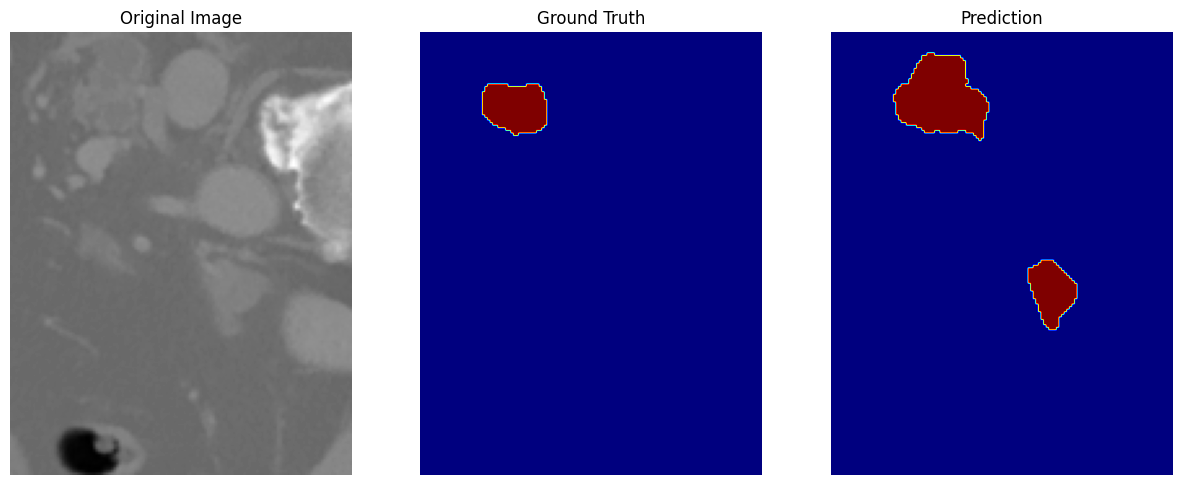

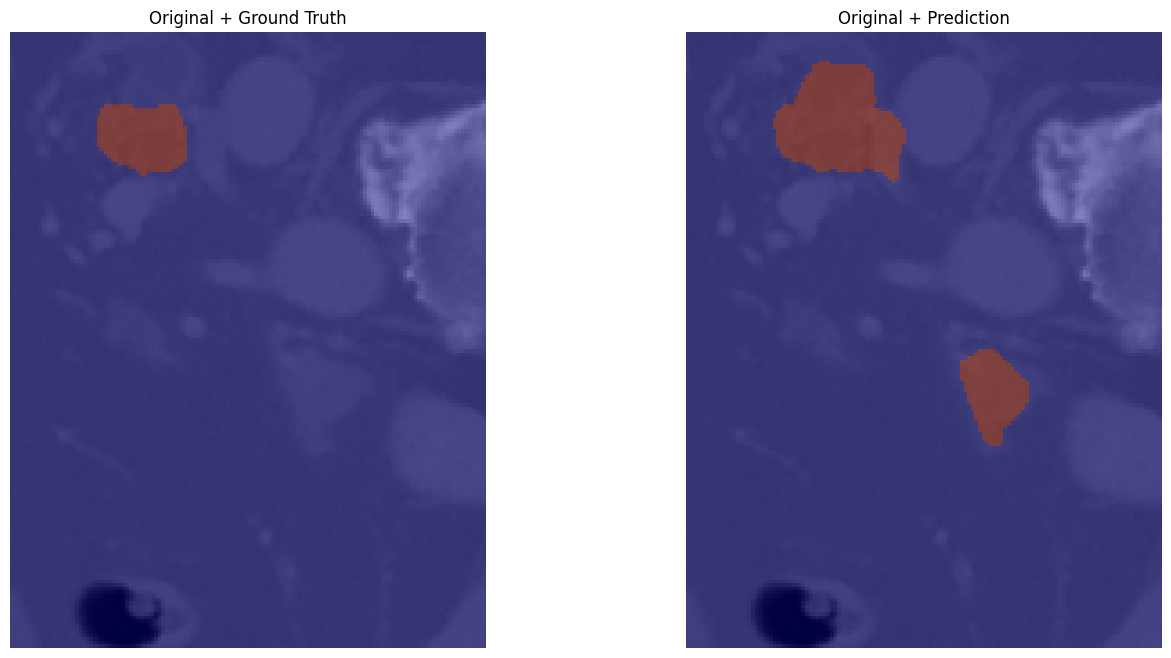

In [16]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def load_nifti_image(file_path):
    """Load a NIfTI image and return the data as a numpy array."""
    nifti_image = nib.load(file_path)
    return nifti_image.get_fdata()

def show_slices(slices, titles=None, cmaps=None):
    """Function to display a row of image slices."""
    fig, axes = plt.subplots(1, len(slices), figsize=(15, 15))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap=cmaps[i] if cmaps else 'gray')
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

def show_overlay(image, label, prediction, slice_index, alpha=0.5):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Original + Ground Truth
    axes[0].imshow(image[:, :, slice_index], cmap='gray')
    axes[0].imshow(label[:, :, slice_index], cmap='jet', alpha=alpha)
    axes[0].set_title('Original + Ground Truth')
    axes[0].axis('off')

    # Original + Prediction
    axes[1].imshow(image[:, :, slice_index], cmap='gray')
    axes[1].imshow(prediction[:, :, slice_index], cmap='jet', alpha=alpha)
    axes[1].set_title('Original + Prediction')
    axes[1].axis('off')
    
    plt.show()

# Define paths to the original image and prediction files
original_image_path = '/scratch/alif/nnUNet/nnUNet_raw/Dataset006_PancreasUHN/imagesTr/case_0009_0000.nii.gz'  
label_path = '/scratch/alif/nnUNet/nnUNet_raw/Dataset006_PancreasUHN/labelsTr/case_0009.nii.gz'  
prediction_path = '/scratch/alif/nnUNet/nnUNet_results/Dataset006_PancreasUHN/nnUNetTrainer_1epoch__nnUNetPlans__3d_fullres/fold_0/validation/case_0009.nii.gz'

# Load image and prediction
label = load_nifti_image(label_path)
original_image = load_nifti_image(original_image_path)
prediction = load_nifti_image(prediction_path)

# Select a slice to display
slice_index = original_image.shape[2] // 2

# Display the original image, ground truth label, and prediction side by side
show_slices(
    [original_image[:, :, slice_index], label[:, :, slice_index], prediction[:, :, slice_index]],
    titles=['Original Image', 'Ground Truth', 'Prediction'],
    cmaps=['gray', 'jet', 'jet']
)

# Display overlay of original image with ground truth and prediction
show_overlay(original_image, label, prediction, slice_index)
